<h1>Import the Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Get the dataset</h1>

In [2]:
df = pd.read_csv('titanic.csv')
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


<h1>Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Observations - age has missing value, fare has one missing value, cabin also has a lot of missing values so it should be removed, embarked has 2 missing values, 

<h1> Clean the Dataset</h1>

1. check the duplicates
2. check for missing values
3. check for invalif dtypes


In [4]:
df.duplicated().any()
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1


In [5]:
# plt.figure(figsize=(4,7))
# sns.boxplot(data=df['age'])
# Lots of outliers
# sns.boxplot(data=df['fare'])# Lots of outliers

In [6]:
md_age = df['age'].median() #Since there were too many outliers we are using median or else we can use mean
md_fare = df['fare'].median()
m_emb = df['embarked'].mode()[0] #Sonce it is not numeric type we use mode to replace empty values

In [7]:
for col,val in zip(['embarked','age','fare'],[m_emb,md_age,md_fare]):
    df[col] = df[col].fillna(val)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
# df['age'] = df['age'].fillna(md_age)
# df['fare'] = df['fare'].fillna(md_fare)
# df['embarked'] = df['embarked'].fillna(m_emb)

In [10]:
df = df.drop(columns='cabin')

In [11]:
# df['embarked'].unique() # to check the unque values of embarked row

<h1>Data Tranformation/Feature Engineering</h1>

1. create nwe columns if needed
2. modify the data if needed

In [12]:
df['embarked'] = df['embarked'].replace({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

In [13]:
df['family_count'] = df['sibsp']+df['parch']
df = df.drop(columns=['parch','sibsp'])

We added the values of sibsp and parch as family_count and dropped them

In [14]:
df['lname'] = df['name'].str.split(',',expand=True)[0]
df['title'] = df['name'].str.split('.',expand=True)[0].str.split(',',expand=True)[1]
df['fname'] = df['name'].str.split('.',expand=True)[1]


In [15]:
df = df.drop(columns=['name'])

In [16]:
df.columns

Index(['pclass', 'sex', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'family_count', 'lname', 'title', 'fname'],
      dtype='object')

In [17]:
lst = ['title','fname','lname','age','sex','family_count','ticket','pclass','fare', 'embarked', 'survived']
df = df[lst]
df = df.rename(columns={'sex':'gender'})

In [18]:
df['age'] = df['age'].round(2)
df['fare'] = df['fare'].round(2)
df

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived
0,Miss,Elisabeth Walton,Allen,29.00,female,0,24160,1,211.34,Southampton,1
1,Master,Hudson Trevor,Allison,0.92,male,3,113781,1,151.55,Southampton,1
2,Miss,Helen Loraine,Allison,2.00,female,3,113781,1,151.55,Southampton,0
3,Mr,Hudson Joshua Creighton,Allison,30.00,male,3,113781,1,151.55,Southampton,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,25.00,female,3,113781,1,151.55,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,Miss,Hileni,Zabour,14.50,female,1,2665,3,14.45,Cherbourg,0
1305,Miss,Thamine,Zabour,28.00,female,1,2665,3,14.45,Cherbourg,0
1306,Mr,Mapriededer,Zakarian,26.50,male,0,2656,3,7.22,Cherbourg,0
1307,Mr,Ortin,Zakarian,27.00,male,0,2670,3,7.22,Cherbourg,0


In [19]:
for i in ['title','lname','fname','embarked']:
    df[i]= df[i].str.strip()
df

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived
0,Miss,Elisabeth Walton,Allen,29.00,female,0,24160,1,211.34,Southampton,1
1,Master,Hudson Trevor,Allison,0.92,male,3,113781,1,151.55,Southampton,1
2,Miss,Helen Loraine,Allison,2.00,female,3,113781,1,151.55,Southampton,0
3,Mr,Hudson Joshua Creighton,Allison,30.00,male,3,113781,1,151.55,Southampton,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,25.00,female,3,113781,1,151.55,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,Miss,Hileni,Zabour,14.50,female,1,2665,3,14.45,Cherbourg,0
1305,Miss,Thamine,Zabour,28.00,female,1,2665,3,14.45,Cherbourg,0
1306,Mr,Mapriededer,Zakarian,26.50,male,0,2656,3,7.22,Cherbourg,0
1307,Mr,Ortin,Zakarian,27.00,male,0,2670,3,7.22,Cherbourg,0


In [ ]:
x = df['ticket'].value_counts()
solo = x[x==1].index

In [31]:
df.loc[df['ticket'].isin(solo)]

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived
5,Mr,Harry,Anderson,48.0,male,0,19952,1,26.55,Southampton,1
7,Mr,Thomas Jr,Andrews,39.0,male,0,112050,1,0.00,Southampton,0
9,Mr,Ramon,Artagaveytia,71.0,male,0,PC 17609,1,49.50,Cherbourg,0
14,Mr,Algernon Henry Wilson,Barkworth,80.0,male,0,27042,1,30.00,Southampton,1
15,Mr,John D,Baumann,28.0,male,0,PC 17318,1,25.92,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...
1301,Mr,Gerious,Youseff,45.5,male,0,2628,3,7.22,Cherbourg,0
1302,Mr,Wazli,Yousif,28.0,male,0,2647,3,7.22,Cherbourg,0
1306,Mr,Mapriededer,Zakarian,26.5,male,0,2656,3,7.22,Cherbourg,0
1307,Mr,Ortin,Zakarian,27.0,male,0,2670,3,7.22,Cherbourg,0


In [33]:
def f1(d):
    if d['ticket'] in (solo):
        return 'solo'
    else:
        if d['family_count']==0:
            return 'friends'
        else:
            return 'family'
df['companion_type'] = df.apply(f1,axis=1)
df

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived,companion_type
0,Miss,Elisabeth Walton,Allen,29.00,female,0,24160,1,211.34,Southampton,1,friends
1,Master,Hudson Trevor,Allison,0.92,male,3,113781,1,151.55,Southampton,1,family
2,Miss,Helen Loraine,Allison,2.00,female,3,113781,1,151.55,Southampton,0,family
3,Mr,Hudson Joshua Creighton,Allison,30.00,male,3,113781,1,151.55,Southampton,0,family
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,25.00,female,3,113781,1,151.55,Southampton,0,family
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Miss,Hileni,Zabour,14.50,female,1,2665,3,14.45,Cherbourg,0,family
1305,Miss,Thamine,Zabour,28.00,female,1,2665,3,14.45,Cherbourg,0,family
1306,Mr,Mapriededer,Zakarian,26.50,male,0,2656,3,7.22,Cherbourg,0,solo
1307,Mr,Ortin,Zakarian,27.00,male,0,2670,3,7.22,Cherbourg,0,solo


sort the data according to the ascending order of the ticket

In [34]:
df = df.sort_values(by=['ticket'],ascending=True)
df

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived,companion_type
67,Miss,Gladys,Cherry,30.0,female,0,110152,1,86.50,Southampton,1,friends
245,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,33.0,female,0,110152,1,86.50,Southampton,1,friends
195,Miss,Roberta,Maioni,16.0,female,0,110152,1,86.50,Southampton,1,friends
289,Miss,Ruth,Taussig,18.0,female,2,110413,1,79.65,Southampton,1,family
291,Mrs,Emil (Tillie Mandelbaum),Taussig,39.0,female,2,110413,1,79.65,Southampton,1,family
...,...,...,...,...,...,...,...,...,...,...,...,...
63,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,47.0,female,1,W.E.P. 5734,1,61.18,Southampton,1,family
62,Mr,Herbert Fuller,Chaffee,46.0,male,1,W.E.P. 5734,1,61.18,Southampton,0,family
433,Mr,Walter,Harris,30.0,male,0,W/C 14208,2,10.50,Southampton,0,solo
81,Capt,Edward Gifford,Crosby,70.0,male,2,WE/P 5735,1,71.00,Southampton,0,family


category column

In [35]:
df['category'] = pd.cut(df['age'],bins=[0,12,17,55,90],labels=['child','teen','adult','senior'],include_lowest=True)
df.reset_index(drop=True)

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived,companion_type,category
0,Miss,Gladys,Cherry,30.0,female,0,110152,1,86.50,Southampton,1,friends,adult
1,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,33.0,female,0,110152,1,86.50,Southampton,1,friends,adult
2,Miss,Roberta,Maioni,16.0,female,0,110152,1,86.50,Southampton,1,friends,teen
3,Miss,Ruth,Taussig,18.0,female,2,110413,1,79.65,Southampton,1,family,adult
4,Mrs,Emil (Tillie Mandelbaum),Taussig,39.0,female,2,110413,1,79.65,Southampton,1,family,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,47.0,female,1,W.E.P. 5734,1,61.18,Southampton,1,family,adult
1305,Mr,Herbert Fuller,Chaffee,46.0,male,1,W.E.P. 5734,1,61.18,Southampton,0,family,adult
1306,Mr,Walter,Harris,30.0,male,0,W/C 14208,2,10.50,Southampton,0,solo,adult
1307,Capt,Edward Gifford,Crosby,70.0,male,2,WE/P 5735,1,71.00,Southampton,0,family,senior


1. Get count of Passenegers

In [36]:
df['fname'].count()

np.int64(1309)

2. get the passenger details if the fare is 0

In [37]:
df.loc[df['fare']==0]

,title,fname,lname,age,gender,family_count,ticket,pclass,fare,embarked,survived,companion_type,category
7,Mr,Thomas Jr,Andrews,39.0,male,0,112050,1,0.0,Southampton,0,solo,adult
70,Mr,Roderick Robert Crispin,Chisholm,28.0,male,0,112051,1,0.0,Southampton,0,solo,adult
223,Mr,William Henry Marsh,Parr,28.0,male,0,112052,1,0.0,Southampton,0,solo,adult
170,Mr,Joseph Bruce,Ismay,49.0,male,0,112058,1,0.0,Southampton,1,friends,adult
125,Mr,Richard,Fry,28.0,male,0,112058,1,0.0,Southampton,0,friends,adult
150,Mr,William,Harrison,40.0,male,0,112059,1,0.0,Southampton,0,solo,adult
234,Jonkheer,John George,Reuchlin,38.0,male,0,19972,1,0.0,Southampton,0,solo,adult
528,Mr,"Francis ""Frank""",Parkes,28.0,male,0,239853,2,0.0,Southampton,0,friends,adult
384,Mr,Alfred Fleming,Cunningham,28.0,male,0,239853,2,0.0,Southampton,0,friends,adult
363,Mr,William,Campbell,28.0,male,0,239853,2,0.0,Southampton,0,friends,adult


3. get the gender wise passengers count and survival rate

In [38]:
df.groupby(['gender']).agg({'gender':'count','survived':'mean'})

,gender,survived
gender,,
female,466,0.727468
male,843,0.190985


4. get the pclass wise passenger count and survival rate (if wise is mentioned use groupby and agg)

In [39]:
df.groupby(['pclass']).agg({'fname':'count','fare':'sum','survived':'mean'})

,fname,fare,survived
pclass,,,
1,323,28265.42,0.619195
2,277,5866.65,0.429603
3,709,9433.07,0.255289


5. Get the genderwise highest and lowest fare

In [40]:
df.groupby(['gender']).agg({'fare':'max','fare':'min'})

,fare
gender,
female,6.75
male,0.00


6. Get the number of unique values from the ticket column

In [41]:
df['ticket'].nunique()

929

7. get the ticket wise number of passengers 

In [42]:
df.groupby(['gender']).agg({'survived':'mean'})

,survived
gender,
female,0.727468
male,0.190985


8. Get the survived and non-survived passenger count


In [43]:
df.corr(numeric_only=True)

,age,family_count,pclass,fare,survived
age,1.000000,-0.193742,-0.377908,0.178180,-0.043817
family_count,-0.193742,1.000000,0.050027,0.226613,0.026876
pclass,-0.377908,0.050027,1.000000,-0.558681,-0.312469
fare,0.178180,0.226613,-0.558681,1.000000,0.244414
survived,-0.043817,0.026876,-0.312469,0.244414,1.000000


In [44]:
df.groupby('pclass')['survived'].mean().idxmax()

np.int64(1)

Plots

1. plot the total count of male and female passengers

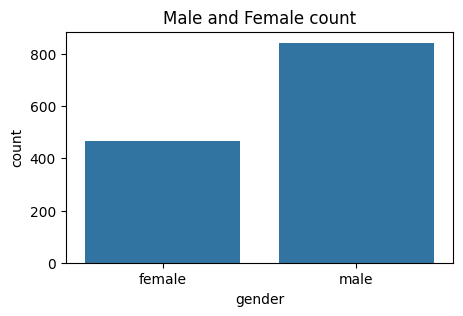

In [45]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='gender')
plt.title("Male and Female count")
plt.show()

Observation - More male members than female

2. count the total count of male and femal passengers in eacth passenger class

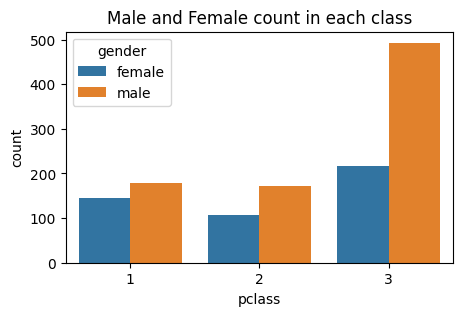

In [46]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='pclass',hue="gender")
plt.title("Male and Female count in each class")
plt.show()

Observation - All classes have more ale members than female members

3. plot the survived and non-survived count for each gender

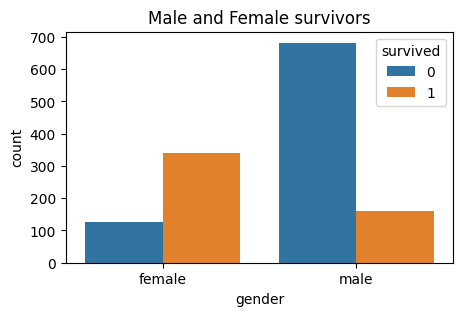

In [47]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='gender',hue="survived")
plt.title("Male and Female survivors")
plt.show()

Observation - Females survived is more than females who didnt survive and Males survived is less than males who didnt survive

4. plot the distribution of fare

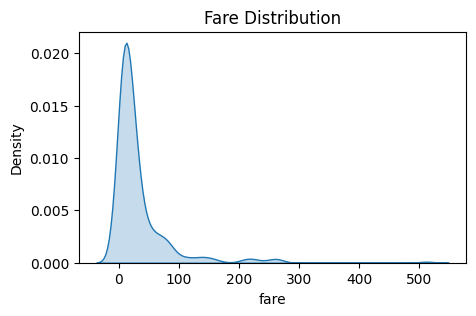

In [48]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df,x='fare',fill=True)
plt.title("Fare Distribution")
plt.show()

Observation - More people paid less than 100$ 

5. Plot distrbution of age

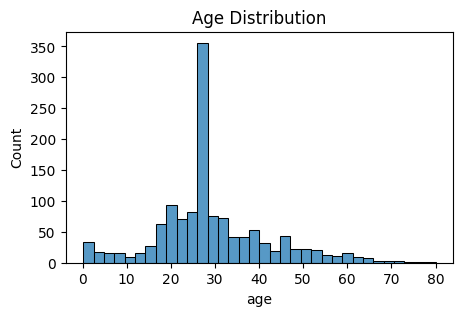

In [49]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='age')
plt.title("Age Distribution")
plt.show()

Observation - More people in the 20 to 30 years age group

6. plot the percentage of age category

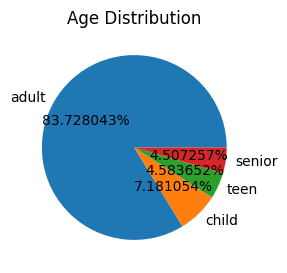

In [50]:
val = df['category'].value_counts().values
idx = df['category'].value_counts().index
plt.figure(figsize=(5,3))
plt.pie(labels=idx,x=val,autopct="%1f%%")
plt.title("Age Distribution")
plt.show()

Observation - More Adults

7. plot the total fare of each pclass, gender

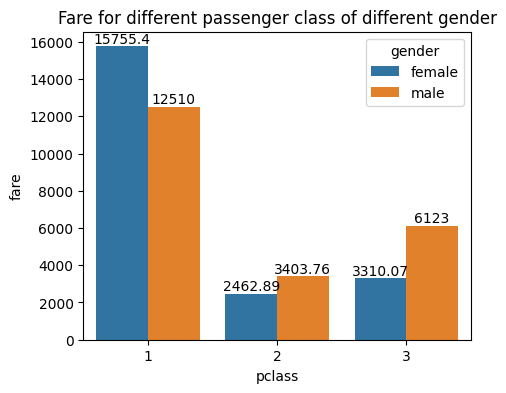

In [51]:
plt.figure(figsize=(5,4))
c = sns.barplot(data=df,x='pclass',y='fare',estimator='sum',hue='gender',errorbar=None)
# c.bar_label(c.containers[0])
for i in c.containers:
    c.bar_label(i)
plt.title("Fare for different passenger class of different gender")
plt.show()

Observation - 
1. In 1st class Females paid more 
2. In 2nd and 3rd class Males paid more

8. plot the average fare for each pclass

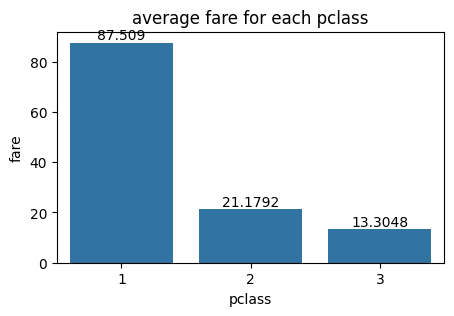

In [52]:
plt.figure(figsize=(5,3))
a = sns.barplot(data=df,x='pclass',y='fare',estimator='mean',errorbar=None)
a.bar_label(a.containers[0])
plt.title("average fare for each pclass")
plt.show()

Observation - 1st class passeneger had higher average fair amongst them all

9. plot the survival rate in each pclass

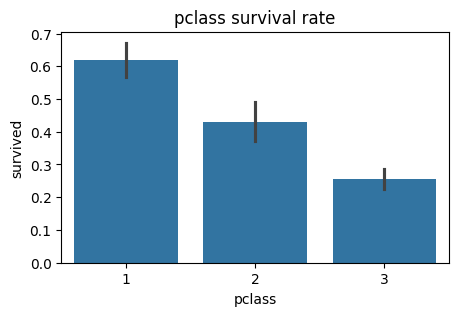

In [53]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='pclass',y='survived',estimator='mean')
plt.title("pclass survival rate")
plt.show()

Observation - 1st class passengers had highest survival rate

10. Apply the scatterplot for fare and age

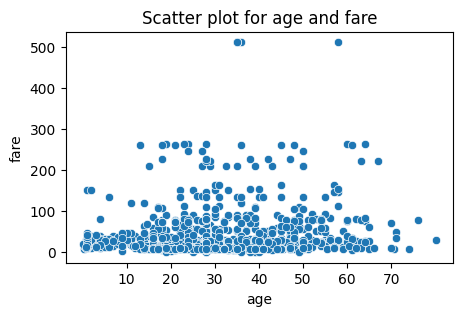

In [54]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df,x='age',y='fare')
plt.xticks(range(10,80,10))
plt.title("Scatter plot for age and fare")
plt.show()

Observation - more people from age 10 to 80 paid 100 or less than 100 for fare

11. Detect the outliers in i.age ii.fare

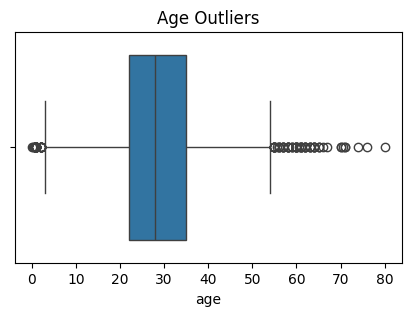

In [55]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='age')
plt.title("Age Outliers")
plt.show()

Observation - There were few infants and a lot of senoir class memebers

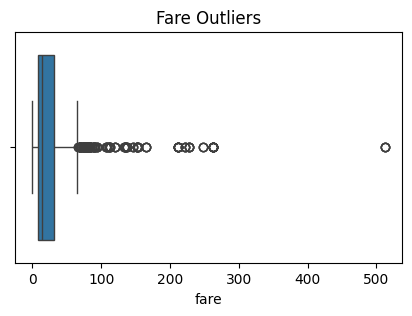

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='fare')
plt.title("Fare Outliers")
plt.show()

Observation - Lots of people paid more than 100$

12. Provide the Heatmap for numerical data

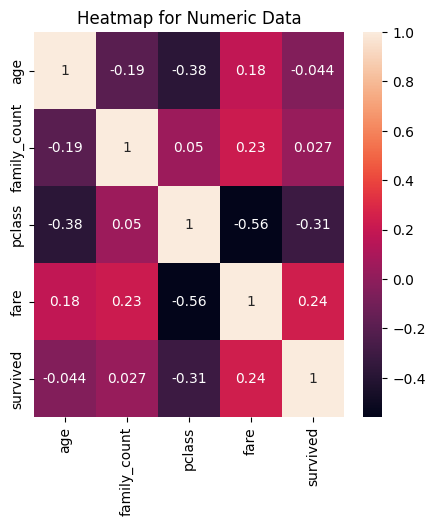

In [57]:
a = df.corr(numeric_only=True)
plt.figure(figsize=(5,5))
sns.heatmap(a,annot=True)
plt.title("Heatmap for Numeric Data")
plt.show()

Ovservation - 
1. fare and survived(24%),family_count and a 

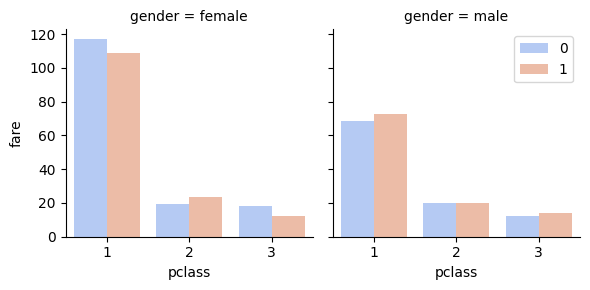

In [58]:
fg = sns.FacetGrid(df,col='gender')
fg.map_dataframe(func=sns.barplot,x='pclass',y='fare',hue='survived',palette='coolwarm',hue_order=[0,1],errorbar=None)
plt.legend()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [60]:
x = df.drop(columns="survived")
y = df['survived']

num_cols = x.select_dtypes(include=['number']).columns
cat_cols = x.select_dtypes(include=['object']).columns
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,train_size=0.8)

In [61]:
preprocess = ColumnTransformer(
    transformers=[
        ("encode",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),cat_cols),
        ("scale",StandardScaler(),num_cols)
    ]
)

In [62]:
model = Pipeline(
    steps=[
        ("preprocess",preprocess),
        ("algorithm",RandomForestClassifier())
    ]
)

In [63]:
model.fit(xtrain,ytrain)

,steps,"[('preprocess', ...), ('algorithm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encode', ...), ('scale', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
model.score(xtrain,ytrain)

1.0

In [65]:
model.score(xtest,ytest)

0.851145038167939